In [1]:
import pandas as pd
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 200

col_names = ["submission_id", "session","date","level","code","server_error","client_error","version", "lang", "email", "username", "is_test", "demo", "start"]
print(len(col_names))

df = pd.read_csv("../../Data/2-logs-plain-2.csv", names=col_names)
df = df.iloc[1:]

#df = df.loc[df['demo'] != True]
#df = df.loc[df['start'] != True]        

df['level'] = pd.to_numeric(df.level, errors='coerce')
df = df.loc[df['level'] < 14]

14


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


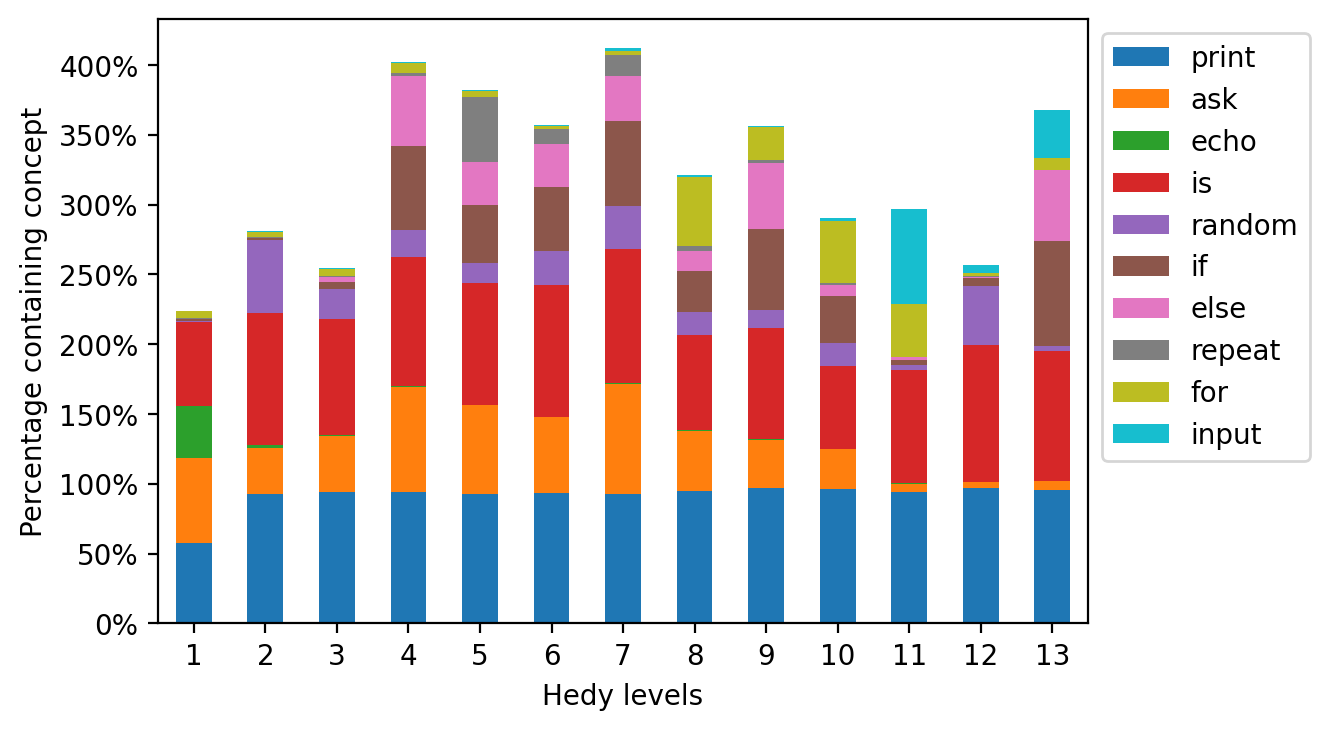

In [5]:
import matplotlib.ticker as mtick

#For each level count if a concept is used within the program and create a stacked bar graph
#The stacked bar graph will be relative: all should be 0-100 and showing the used concepts
concepts = ['print', 'ask', 'echo', 'is', 'random', 'if', 'else', 'repeat', 'for', 'input']

df_concepts = df[['level']].copy()
for concept in concepts:
    df_concepts[concept] = df['code'].str.contains(concept)

df_level_count = df_concepts['level'].value_counts().reset_index()
df_level_count.columns = ['level', 'count']

df_concepts = df_concepts.groupby(by="level").sum()
df_concepts = pd.merge(df_concepts, df_level_count, on = "level", how = "inner") 

for concept in concepts:
    df_concepts[concept] = df_concepts[concept] / df_concepts['count'] * 100

del df_concepts['count']   
df_concepts = df_concepts.set_index('level')
df_concepts.index = df_concepts.index.astype(int)
#df_concepts = df_concepts.mask(df_concepts < 5) Delete if a concept is used in less then x % of the programs

plot = df_concepts.plot(rot=0, kind='bar', stacked=True)
plot.yaxis.set_major_formatter(mtick.PercentFormatter())
plot.set_xlabel("Hedy levels")
plot.set_ylabel("Percentage containing concept")
plot.legend(bbox_to_anchor=(1,1), loc="upper left")